In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import Calibrate
import pandas as pd

In [2]:
col_names_p = ['Peak', 'L_lim', 'U_lim', 'Mean', 'Mean_err', 'Std', 'Std_err', 'Amp', 'Amp_err', 'a', 'a_err', 'b', 'b_err', 'c', 'c_err']
col_names_d = ['Detector', 'a', 'a_err', 'b', 'b_err', 'Channels']
peak_data = pd.read_csv('CdTe_Output.txt', header=0, skipfooter=3, names=col_names_p, encoding= "ISO-8859-1", engine='python')
detec_data = pd.read_csv('CdTe_Output.txt', header=len(peak_data['Peak'])+2, names=col_names_d, encoding= "ISO-8859-1", engine='python')

detec_data['Channels'][0]

2048

In [3]:
x = np.arange(0,detec_data['Channels'][0],1)
energy_range = Calibrate.linear(x, detec_data['a'][0], detec_data['b'][0])
energy_range

array([ -3.53,  -3.39,  -3.25, ..., 282.77, 282.91, 283.05])

In [4]:
#some standar deviation values ended up negative so take an absolute value
energies = []
for p in peak_data['Peak']:
    energies.append(float(p.split()[1]))

fwhm = 2*np.sqrt(2*np.log(2))*abs(peak_data['Std'])
resolution = fwhm/peak_data['Mean']


In [5]:
def resolution_model(x,a,b,c):
    return (a/(x**2) + b/x + c)

In [6]:
peak_data['Mean'], energies, resolution

(0    355.38
 1    279.23
 2    615.16
 Name: Mean, dtype: float64,
 [59.54, 26.34, 81.0],
 0    0.017294
 1    0.024372
 2    0.024997
 dtype: float64)

In [7]:
popt, pcov = opt.curve_fit(resolution_model, energies, resolution**2, p0=[1000,1000,1000])
y_model = resolution_model(energy_range,popt[0],popt[1],popt[2])
popt, pcov
np.sqrt(np.inf)

C:\Users\Owner\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


inf

In [8]:
dghfv = '±79'
dghfv.strip('±')

'79'

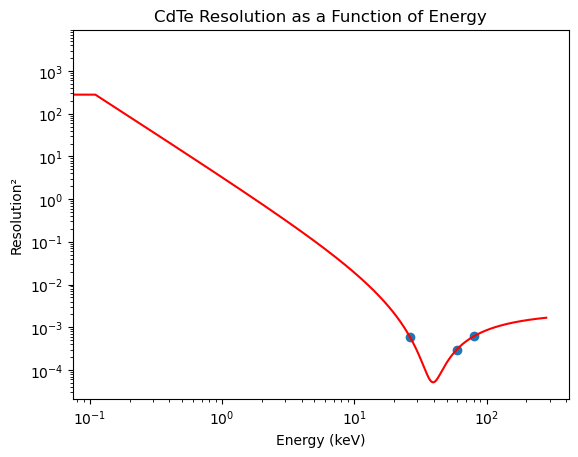

In [9]:
plt.scatter(energies,resolution**2);
plt.xlabel('Energy (keV)');
plt.ylabel(f'Resolution\u00b2');
plt.title(f"{detec_data['Detector'][0]} Resolution as a Function of Energy");
plt.yscale('log')
plt.xscale('log')
plt.plot(energy_range,y_model, c='r');